In [ ]:
import numpy as np
np.set_printoptions(threshold=None,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
warnings.filterwarnings('ignore')

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import svm


## Partie 1 : Apprentissage supervisé : Feature engineering et Classification

#### 1)  Chargement des données et préparation

In [ ]:
# Importer le jeu de données
data = pd.read_csv('./credit_scoring.csv', sep=';')
data.head()

,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price,Status
0,9.0,1.0,60.0,30.0,0.0,1.0,1.0,73.0,129.0,0.0,0.0,800.0,846.0,1
1,17.0,1.0,60.0,58.0,1.0,1.0,0.0,48.0,131.0,0.0,0.0,1000.0,1658.0,1
2,10.0,0.0,36.0,46.0,0.0,2.0,1.0,90.0,200.0,3000.0,0.0,2000.0,2985.0,0
3,0.0,1.0,60.0,24.0,1.0,1.0,0.0,63.0,182.0,2500.0,0.0,900.0,1325.0,1
4,0.0,1.0,36.0,26.0,1.0,1.0,0.0,46.0,107.0,0.0,0.0,310.0,910.0,1


In [ ]:
# Statistique descriptive
#data.describe()

In [ ]:
# Transformer votre jeu de données issue de pandas qui sera de type Data Frame en numpy Array
X = data.iloc[:, 0:13].values
Y = data.iloc[:, 13].values

In [ ]:
print(X)

[[   9.    1.   60. ...    0.  800.  846.]
 [  17.    1.   60. ...    0. 1000. 1658.]
 [  10.    0.   36. ...    0. 2000. 2985.]
 ...
 [   0.    0.   24. ...    0.  500.  963.]
 [   0.    1.   48. ...    0.  550.  550.]
 [   5.    0.   60. ... 1000. 1350. 1650.]]


In [ ]:
Y

array([1, 1, 0, ..., 0, 1, 1])

In [ ]:
np.shape(X)

(4375, 13)

In [ ]:
print("le nombre de données ( Nbr de ligne)",X.shape[0])
print("le nombre de paramètres ( Nbr de feature)",X.shape[1])
#print("nombre d’exemples positifs",Y[Y>0].shape[0])
#print("nombre d’exemples négatifs",Y[Y<=0].shape[0])

le nombre de données ( Nbr de ligne) 4375
le nombre de paramètres ( Nbr de feature) 13


In [ ]:
print("les valeurs possible du target Status sont", data.Status.unique())

les valeurs possible du target Status sont [1 0]


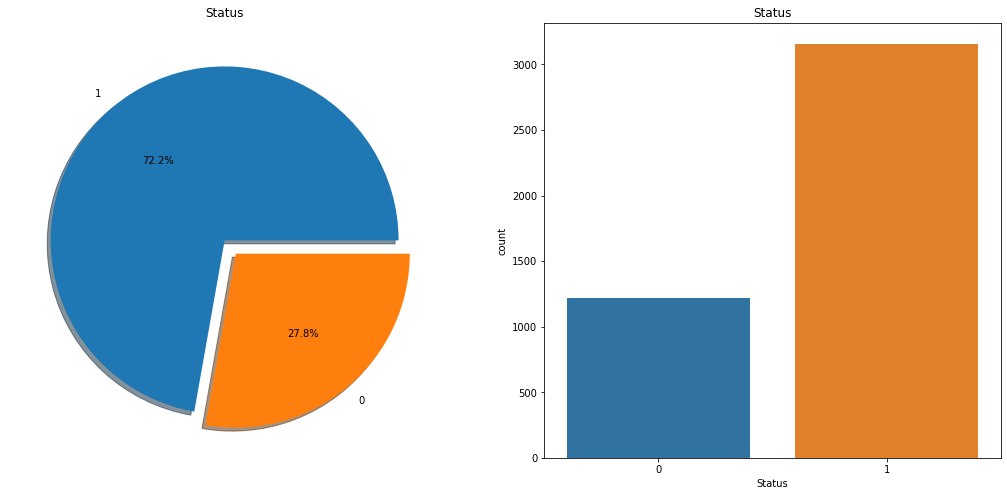

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Status'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Status')
ax[0].set_ylabel('')
sns.countplot('Status',data=data,ax=ax[1])
ax[1].set_title('Status')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=1)

print(X_train)
print("================================================================")
print(X_test)
print("================================================================")
print(y_train)
print("================================================================")
print(y_test)

[[   2.    1.   48. ...    0. 1100. 1464.]
 [  15.    0.   24. ...    0.  590. 1793.]
 [   1.    1.   48. ...    0. 1300. 1533.]
 ...
 [  11.    1.   12. ...    0.  300. 1479.]
 [   0.    1.   48. ...    0.  600. 1452.]
 [   1.    1.   36. ...    0. 1200. 2186.]]
[[   0.    1.   36. ...    0.  800. 1212.]
 [   1.    1.   60. ...    0. 1000. 1375.]
 [   3.    1.   48. ...    0. 1287. 1693.]
 ...
 [  12.    0.   48. ...    0. 2380. 4786.]
 [   1.    0.   36. ...  280.  800.  950.]
 [   2.    1.   24. ...    0.  450.  994.]]
[1 1 0 ... 1 0 1]
[1 0 1 ... 1 0 1]


#### 2- Apprentissage et évaluation de modèles

##### a) Le cas d'arbre de décision (CART)

In [ ]:


from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion='gini',random_state=1,max_depth=3)

clf = clf.fit(X_train, y_train)

prediction_Dtree = clf.predict(X_test)

prediction_Dtree

print(prediction_Dtree)

#tree.plot_tree(clf)



[1 1 1 ... 1 1 1]


In [ ]:
print("nombre d’exemples 1",prediction_Dtree[prediction_Dtree>0].shape[0])
print("nombre d’exemples 0",prediction_Dtree[prediction_Dtree<=0].shape[0])

nombre d’exemples 1 1934
nombre d’exemples 0 254


In [ ]:
# Metrics pour l'Arbre de décision
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print(accuracy_score(y_test,prediction_Dtree ))

print(confusion_matrix(y_test,prediction_Dtree ))

print(classification_report(y_test,prediction_Dtree, target_names=["class 0","class 1"]))


0.7605118829981719
[[ 167  437]
 [  87 1497]]
              precision    recall  f1-score   support

     class 0       0.66      0.28      0.39       604
     class 1       0.77      0.95      0.85      1584

    accuracy                           0.76      2188
   macro avg       0.72      0.61      0.62      2188
weighted avg       0.74      0.76      0.72      2188



##### b) KNN

In [ ]:
# La cas de KNN

from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=5)

KNN.fit(X_train, y_train)

prediction_knn = KNN.predict(X_test)

prediction_knn

print(prediction_knn)

[1 0 1 ... 1 1 1]


In [ ]:
print("nombre d’exemples 1",prediction_knn[prediction_knn>0].shape[0])
print("nombre d’exemples 0",prediction_knn[prediction_knn<=0].shape[0])

nombre d’exemples 1 1812
nombre d’exemples 0 376


In [ ]:
# Metrics de KNN
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print(accuracy_score(y_test,prediction_knn ))

print(confusion_matrix(y_test,prediction_knn ))

print(classification_report(y_test,prediction_knn, target_names=["class 0","class 1"]))

0.7248628884826326
[[ 189  415]
 [ 187 1397]]
              precision    recall  f1-score   support

     class 0       0.50      0.31      0.39       604
     class 1       0.77      0.88      0.82      1584

    accuracy                           0.72      2188
   macro avg       0.64      0.60      0.60      2188
weighted avg       0.70      0.72      0.70      2188



 Comparaison du résultat entre les deux algo Dtree et KNN : 

 Le meilleur résultat est celui obtenu par l’algorithme de ‘arbre CART’ puisqu’il permet une accuracy de 0.76 plus grande que knn et un F-score plus grand que knn. Cette s’est appuyé aussi sur F-score puisqu’il permet d’avoir un compromis entre le Rappel et la Précision




#### 3) Normalisation des variables continues

In [ ]:
# Standardize the Data

from sklearn.preprocessing import StandardScaler

# Standardizing the features

# Normalisation des données

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler( with_mean=True, with_std=True)
X_train_norm = scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)
print("les données sont centrées autour des moyennes ( StandadScaler): " ,np.mean(X_train_norm, axis=0))

# Normalisation des données avec minmaxscaler
from sklearn.preprocessing import MinMaxScaler
scaler_minmax = MinMaxScaler()
X_train_norm_2 = scaler_minmax.fit(X_train)
X_train_norm_2 = scaler_minmax.transform(X_train)
X_test_norm_2 = scaler_minmax.transform(X_test)
print("les données sont centrées autour des moyennes(MinMaxSclaer) : " ,np.mean(X_train_norm_2, axis=0))


ss= StandardScaler()
X_ss = ss.fit_transform(X)

print(X_train_norm)
print("================================================================")
print(X_test_norm)


les données sont centrées autour des moyennes ( StandadScaler):  [ 0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0.  0. -0.]
les données sont centrées autour des moyennes(MinMaxSclaer) :  [0.16600937 0.53680841 0.74846314 0.38515775 0.27343393 0.15957933
 0.36168267 0.14849274 0.13697396 0.02197132 0.01155184 0.24259693
 0.15519814]
[[-0.73307033  0.92890366  0.10845206 ... -0.25903543  0.11153016
  -0.01153308]
 [ 0.8636448  -1.0765379  -1.53580903 ... -0.25903543 -0.94431355
   0.50514188]
 [-0.85589457  0.92890366  0.10845206 ... -0.25903543  0.52558652
   0.09682732]
 ...
 [ 0.37234784  0.92890366 -2.35793958 ... -0.25903543 -1.54469527
   0.01202353]
 [-0.97871882  0.92890366  0.10845206 ... -0.25903543 -0.92361073
  -0.03037837]
 [-0.85589457  0.92890366 -0.71367848 ... -0.25903543  0.31855834
   1.12232505]]
[[-0.97871882  0.92890366 -0.71367848 ... -0.25903543 -0.50955438
  -0.40728412]
 [-0.85589457  0.92890366  0.93058261 ... -0.25903543 -0.09549802
  -0.1513023 ]
 [-0.61024609  0.

In [ ]:
# Arbre CART Avec Normalisation

target_names=  ["0","1"]

clf_norm = tree.DecisionTreeClassifier(random_state=1, criterion='gini', max_depth=3 )
clf_norm = clf.fit(X_train_norm, y_train)
y_pred_clf_norm=clf_norm.predict(X_test_norm)

print("Metrics pour Dtree ( cas normalisé):")
print("accuracy est de : " , accuracy_score(y_test, y_pred_clf_norm))
print(classification_report(y_test, y_pred_clf_norm, target_names=target_names))


print("=======================================================")
print("Metrics pour KNN ( cas normalisé):")

# KNN Avec Normalisation

KNN_norm = KNeighborsClassifier(n_neighbors=5)
KNN_norm.fit(X_train_norm, y_train)
y_pred_knn_norm=KNN_norm.predict(X_test_norm)
print("accuracy est de : " , accuracy_score(y_test, y_pred_knn_norm))
print(classification_report(y_test, y_pred_knn_norm, target_names=target_names))

Metrics pour Dtree ( cas normalisé):
accuracy est de :  0.7605118829981719
              precision    recall  f1-score   support

           0       0.66      0.28      0.39       604
           1       0.77      0.95      0.85      1584

    accuracy                           0.76      2188
   macro avg       0.72      0.61      0.62      2188
weighted avg       0.74      0.76      0.72      2188

Metrics pour KNN ( cas normalisé):
accuracy est de :  0.7527422303473492
              precision    recall  f1-score   support

           0       0.56      0.47      0.51       604
           1       0.81      0.86      0.83      1584

    accuracy                           0.75      2188
   macro avg       0.69      0.67      0.67      2188
weighted avg       0.74      0.75      0.75      2188



Avec la normalisation le résultat de l’algorithme KNN est amélioré par rapport à la question précédente  tandis que les résultats de l’arbre CART sont résultats tel qu’ils étaient.

#### 4 ) Création de nouvelles variables caractéristiques par combinaisons linéaires des variables initiales

In [ ]:
# PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
principalComponents = pca.fit(X_train_norm)
principalComponents_train=principalComponents.fit_transform(X_train_norm)
principalComponents_test=principalComponents.fit_transform(X_test_norm)
print(pca.components_[0,:])
print(pca.components_[1,:])
print(pca.components_[2,:])
info=pca.explained_variance_ratio_
print(info)

sum_info=sum(info)

print(sum_info)

# Concaténation des données
X_train_norm_pca=np.concatenate((X_train_norm,principalComponents_train), axis=1)
X_test_norm_pca=np.concatenate((X_test_norm,principalComponents_test), axis=1)

# calcul de classification
print("=======================================================")

print("Metrics pour Dtree ( cas normalisé):")
# Arbre CART
clf = tree.DecisionTreeClassifier(random_state=1, criterion='gini', max_depth=3 )
clf = clf.fit(X_train_norm_pca, y_train)
y_pred_clf=clf.predict(X_test_norm_pca)
print("accuracy est de : " , accuracy_score(y_test, y_pred_clf))
print(classification_report(y_test, y_pred_clf, target_names=target_names))

print("=======================================================")
print("Metrics pour KNN ( cas normalisé):")
# KNN
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train_norm_pca, y_train)
y_pred_knn=KNN.predict(X_test_norm_pca)
print("accuracy est de : " , accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn, target_names=target_names))

[ 0.38660896 -0.35157084  0.08002648  0.43181491 -0.43062908  0.05439091
 -0.00882293  0.32959485  0.2789956   0.22820574  0.10681084  0.205118
  0.23141817]
[-0.22350205  0.10801023  0.48031615 -0.24835472  0.11801537  0.12211983
 -0.02442772 -0.09096411  0.05843505  0.03006666  0.07114837  0.59762846
  0.49167507]
[-0.0460134  -0.3316929  -0.25820649  0.09324664  0.2260364  -0.05067273
  0.60941217 -0.40787124 -0.12009363  0.40130637  0.12839411  0.06344273
  0.1584785 ]
[0.19930597 0.14436086 0.1015721 ]
0.4452389207193934
Metrics pour Dtree ( cas normalisé):
accuracy est de :  0.7605118829981719
              precision    recall  f1-score   support

           0       0.66      0.28      0.39       604
           1       0.77      0.95      0.85      1584

    accuracy                           0.76      2188
   macro avg       0.72      0.61      0.62      2188
weighted avg       0.74      0.76      0.72      2188

Metrics pour KNN ( cas normalisé):
accuracy est de :  0.7637111517

 Avec l'ajout des ces paramètres aux paramètres du modèle normalisés, le résultat de l’algorithme KNN est amélioré et devenu meilleur que celui de l’arbre CART en accuracy et F-score.

In [ ]:
AxesPCA= ["pca1","pca2","pca3"]

#features =data.columns + AxesPCA

features=np.concatenate(((data.columns[:-1]),(AxesPCA)))
print(features)
print(len(features))

['Seniority' 'Home' 'Time' 'Age' 'Marital' 'Records' 'Job' 'Expenses'
 'Income' 'Assets' 'Debt' 'Amount' 'Price' 'pca1' 'pca2' 'pca3']
16


In [ ]:
print(X_train_norm_pca.shape)

(2187, 16)


#### 5) Selection des variables

16
16
['Income' 'Seniority' 'pca2' 'pca3' 'Price' 'Amount' 'pca1' 'Age'
 'Records' 'Assets' 'Expenses' 'Job' 'Time' 'Debt' 'Home' 'Marital']


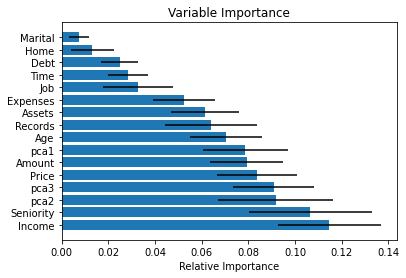

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train_norm_pca, y_train)
importances=clf.feature_importances_

std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0)

sorted_idx = np.argsort(importances)[::-1]

print(len(importances))

print(len(sorted_idx))

print(features[sorted_idx])

padding = np.arange(X_train_norm_pca.size/len(X_train_norm_pca)) + 0.5
plt.barh(padding, importances[sorted_idx],xerr=std[sorted_idx], align='center')
plt.yticks(padding, features[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()

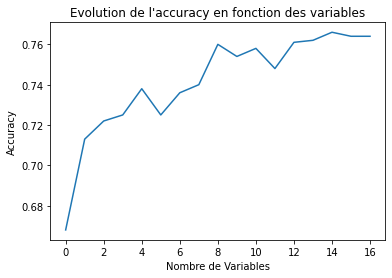

In [ ]:
KNN=KNeighborsClassifier(n_neighbors=5)
scores=np.zeros(X_train_norm_pca.shape[1]+1)
for f in np.arange(0, X_train_norm_pca.shape[1]+1):
    X1_f = X_train_norm_pca[:,sorted_idx[:f+1]]
    X2_f = X_test_norm_pca[:,sorted_idx[:f+1]]
    KNN.fit(X1_f,y_train)
    YKNN=KNN.predict(X2_f)
    scores[f]=np.round(accuracy_score(y_test,YKNN),3)
plt.plot(scores)
plt.xlabel("Nombre de Variables")
plt.ylabel("Accuracy")
plt.title("Evolution de l'accuracy en fonction des variables")
plt.show()

In [ ]:
print((scores))
print((scores.shape))
print("accuracy avec 8 variables", scores[8])
print("accuracy avec 12 variables", scores[12])

[0.668 0.713 0.722 0.725 0.738 0.725 0.736 0.74  0.76  0.754 0.758 0.748
 0.761 0.762 0.766 0.764 0.764]
(17,)
accuracy avec 8 variables 0.76
accuracy avec 12 variables 0.761


Puisque la valeur de l'accuracy avec 9 variables est très proche de celle avec 13 variables, ce serait judicieux de choisir un nombre de variables de 9.

In [ ]:
print(features[sorted_idx])

print(scores[8])

print('les paramètres les plus importants sont : ', features[sorted_idx][0:9])

print(sorted_idx)

['Income' 'Seniority' 'pca2' 'pca3' 'Price' 'Amount' 'pca1' 'Age'
 'Records' 'Assets' 'Expenses' 'Job' 'Time' 'Debt' 'Home' 'Marital']
0.76
les paramètres les plus importants sont :  ['Income' 'Seniority' 'pca2' 'pca3' 'Price' 'Amount' 'pca1' 'Age'
 'Records']
[ 8  0 14 15 12 11 13  3  5  9  7  6  2 10  1  4]


In [ ]:
nv_X_train_norm= X_train_norm_pca[:,sorted_idx[0:9]]

print(nv_X_train_norm.shape)

nv_X_test_norm= X_test_norm_pca[:,sorted_idx[0:9]]

print(nv_X_test_norm.shape)

(2187, 9)
(2188, 9)


#### 6) Paramétrage des classifieurs

##### a) GridSearchCV pour KNN


In [ ]:
from sklearn.model_selection import GridSearchCV

KNN=KNeighborsClassifier(n_neighbors=5)

# define the parameter values that should be searched
# for python 2, k_range = range(1, 31)
k_range = list(range(1, 31))
print(k_range)

param_grid = dict(n_neighbors=k_range)


print(param_grid)

# instantiate the grid
grid = GridSearchCV(KNN, param_grid, cv=10, scoring='accuracy')

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [ ]:
# fit the grid with data
grid.fit(nv_X_train_norm, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
# view the complete results (list of named tuples)
#print(grid.cv_results_)
best_K=grid.best_params_["n_neighbors"]

print('Le meilleur K est : ', best_K)
print(grid.best_estimator_)
print('Le meilleur score est : ',grid.best_score_)

Le meilleur K est :  23
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=23, p=2,
                     weights='uniform')
Le meilleur score est :  0.768160110594445


In [ ]:
# Modèle final KNN 

KNN_final = KNeighborsClassifier(best_K)


##### b) GridSearchCV pour Dtree








In [ ]:
# On prend  criterion ( gini ou Entropie) et max_depth ( les niveaux ) 


tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}

Dtree= tree.DecisionTreeClassifier()
grid_Dtree= GridSearchCV(Dtree, tree_para, cv=10)


grid_Dtree.fit(nv_X_train_norm, y_train)



GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                  

In [ ]:

Dtree_Para = grid_Dtree.best_params_
print('Les meilleurs paramètres sont : ',Dtree_Para)
print(grid_Dtree.best_estimator_)
print('Le meilleur score est : ',grid_Dtree.best_score_)

Les meilleurs paramètres sont :  {'criterion': 'gini', 'max_depth': 4}
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Le meilleur score est :  0.7558292488793934


In [ ]:
print(Dtree_Para["criterion"])

gini


In [ ]:
# Modèle final Arbre de décision

Dtree_final = tree.DecisionTreeClassifier(criterion=Dtree_Para["criterion"], max_depth= Dtree_Para["max_depth"])

#### 7) Création d’un pipeline

In [ ]:
from sklearn.pipeline import Pipeline, make_pipeline

In [ ]:
pipe= make_pipeline(scaler, pca, KNN_final )

print(pipe)


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=3,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('kneighborsclassifier',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=23, p=2,
                                      weights='uniform'))],
         verbose=False)


In [ ]:
model= pipe.fit(nv_X_train_norm, y_train)

y_pred = model.predict(nv_X_test_norm)

#print(y_pred)


In [ ]:
un=[]
zero=[]

for i in y_pred:
    if i==1:
        un.append(1)
    else:
        zero.append(1)
        
print(len(un))    

print(len(zero))

1954
234


Sauvegarderle modéle en local avec Pickle
 

In [ ]:
import pickle

pickle.dump(model,open('model.pkl','wb'))

model = pickle.load(open('model.pkl','rb'))

prediction = model.predict(nv_X_test_norm)

print(prediction)


[1 1 1 ... 1 1 1]


#### 8) Comparaison de plusieurs algorithmes d’apprentissage

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans, MiniBatchKMeans 
from sklearn.mixture import GaussianMixture 
from sklearn.tree import DecisionTreeClassifier #cart, id3 and decision stump (1 lvl tree)
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier #bagging, RF and adaboost
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier


from sklearn import tree
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, precision_score, accuracy_score, cohen_kappa_score, make_scorer
import time

auc_scorer=make_scorer(roc_auc_score)
acc_scorer=make_scorer(accuracy_score)
precision_scorer=make_scorer(precision_score)
kappa_scorer=make_scorer(cohen_kappa_score)

clfs = {
    #NaiveBayesSimple
    'NBayes': GaussianNB(),
    #Un arbre CART
    'CART': tree.DecisionTreeClassifier(),
    #Un arbre ID3
    'ID3': DecisionTreeClassifier(criterion = "entropy"),
    #MultilayerPerceptron à deux couches de tailles respectives 20 et 10
    #'MLP': MLPClassifier(hidden_layer_sizes=(20,10),max_iter=1000),
    #Random Forest avec 50 classifieurs
    'RF': RandomForestClassifier(n_estimators=50),
    #k-plus-proches-voisins avec k=5
    'KNN': KNeighborsClassifier(n_neighbors=5),
    #Bagging avec 50 classifieurs
    'Bagging': BaggingClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=50),
    #AdaBoost avec 50 classifieurs 
    'Adaboost_depth1':AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=50),
    'Adaboost_depth2':AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=50)
}


def run_classifiers(clfs, X, Y):
    kf = KFold(n_splits=10, shuffle=True, random_state=0)
    for i in clfs:
        init_time = time.time()
        clf = clfs[i]
        clf = clf.fit(X, Y)
        cv_acc = cross_val_score(clf, X, Y, cv=kf)
        kappa_scores=cross_val_score(estimator=clf,X=X,y=Y,cv=kf,scoring=auc_scorer)
        auc_scores= cross_val_score(estimator=clf,X=X,y=Y,cv=kf,scoring=kappa_scorer)
        algo_time = time.time() - init_time
        print("Accuracy for {0} is: {1:.3f} +/- {2:.3f}".format(i, np.mean(cv_acc), np.std(cv_acc)))
        print("kappa for {0} is: {1:.3f} +/- {2:.3f}".format(i, np.mean(kappa_scores), np.std(kappa_scores)))
        print("AUC for {0} is: {1:.3f} +/- {2:.3f}".format(i, np.mean(auc_scores), np.std(auc_scores)))        
        print("execution time is: %s seconds" % algo_time)
        print('\n')

In [ ]:
alpha=run_classifiers(clfs, nv_X_train_norm, y_train)

Accuracy for NBayes is: 0.738 +/- 0.030
AUC for NBayes is: 0.321 +/- 0.064
execution time is: 0.044432640075683594 seconds


Accuracy for CART is: 0.701 +/- 0.018
AUC for CART is: 0.249 +/- 0.079
execution time is: 0.32703447341918945 seconds


Accuracy for ID3 is: 0.695 +/- 0.027
AUC for ID3 is: 0.266 +/- 0.056
execution time is: 0.5485708713531494 seconds


Accuracy for RF is: 0.764 +/- 0.025
AUC for RF is: 0.346 +/- 0.077
execution time is: 4.565350532531738 seconds


Accuracy for KNN is: 0.745 +/- 0.028
AUC for KNN is: 0.310 +/- 0.071
execution time is: 0.3336310386657715 seconds


Accuracy for Bagging is: 0.723 +/- 0.035
AUC for Bagging is: 0.036 +/- 0.067
execution time is: 2.6568315029144287 seconds


Accuracy for Adaboost_depth1 is: 0.773 +/- 0.028
AUC for Adaboost_depth1 is: 0.382 +/- 0.056
execution time is: 3.6736998558044434 seconds


Accuracy for Adaboost_depth2 is: 0.753 +/- 0.030
AUC for Adaboost_depth2 is: 0.350 +/- 0.061
execution time is: 5.24407434463501 seconds





Le meilleur modèle est 'Adaboost_depth1' qui permet de classifier les données avec un taux de 77.3% (une Accuracy de 77.3%) et est le plus à permettre de ditinguer entre les vrai positifs et les faux positifs (AUC de 0.382). Ce modèle se base sur des méthodes ensemblistes pour le calcul du modèle.
On peut constater que parmi tous ces modèles, MLP prenait beaucoup de temps en exécution et cela est du au grand nombre de couches qu'il contient à l'intérieur.


## Partie 2 : Apprentissage supervisé : Données hétérogènes    

 #### 1) Question 1

##### a) Chargement des données et préparation :

Importer les données

In [ ]:

   
df = pd.read_csv('./credit.data', delimiter="\t",header=None)

data = df.values
X, Y = data[:,:-1], data[:, -1]

df


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260,0,-
684,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200,394,-
685,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200,1,-
686,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280,750,-


remplacer ? par nan

In [ ]:
if "?" in df.values:
    print('Element exists in Dataframe')

Element exists in Dataframe


In [ ]:
# 
df[df.values=="?"]=np.nan

In [ ]:
df.dtypes

0      object
1      object
2     float64
3      object
4      object
5      object
6      object
7     float64
8      object
9      object
10      int64
11     object
12     object
13     object
14      int64
15     object
dtype: object

la taille de l'ensemble X_n est (666, 6)
(array([299.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 367.]), array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), <a list of 10 Patch objects>)


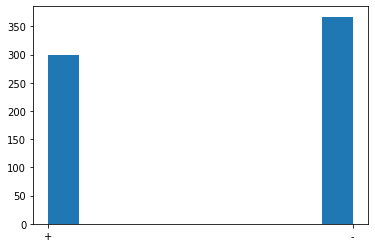

In [ ]:
# sous ensemble 
ens1 = df[[1,2,7,10,13,14,15]]
ens1 = ens1.dropna()
ens1 = ens1.values
X_n,Y_n=ens1[:,:-1],ens1[:,-1]
X_n= X_n.astype(float)
print("la taille de l'ensemble X_n est", X_n.shape)

print("="*100)
import matplotlib.pyplot as plt
print(plt.hist(Y_n))

Binariser la target (+ =1 et - = 0)

In [ ]:
# 
Y_n = np.where(Y_n=='+',1,0)
print(Y_n)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

##### b) Normalisation des variables continues

In [ ]:
# 

from sklearn.preprocessing import StandardScaler
X_scale = StandardScaler().fit_transform(X_n)

run_classifiers(clfs, X_scale, Y_n)

Accuracy for NBayes is: 0.716 +/- 0.050
AUC for NBayes is: 0.398 +/- 0.077
execution time is: 0.04342937469482422 seconds


Accuracy for CART is: 0.721 +/- 0.047
AUC for CART is: 0.429 +/- 0.068
execution time is: 0.0757753849029541 seconds


Accuracy for ID3 is: 0.730 +/- 0.046
AUC for ID3 is: 0.444 +/- 0.076
execution time is: 0.10292696952819824 seconds


Accuracy for RF is: 0.779 +/- 0.046
AUC for RF is: 0.539 +/- 0.116
execution time is: 1.9884867668151855 seconds


Accuracy for KNN is: 0.745 +/- 0.062
AUC for KNN is: 0.474 +/- 0.117
execution time is: 0.08982110023498535 seconds


Accuracy for Bagging is: 0.743 +/- 0.064
AUC for Bagging is: 0.461 +/- 0.110
execution time is: 1.651055097579956 seconds


Accuracy for Adaboost_depth1 is: 0.770 +/- 0.063
AUC for Adaboost_depth1 is: 0.532 +/- 0.120
execution time is: 1.8998143672943115 seconds


Accuracy for Adaboost_depth2 is: 0.743 +/- 0.054
AUC for Adaboost_depth2 is: 0.472 +/- 0.113
execution time is: 2.150606393814087 seconds




On peut remarquer une améliration des mesures AUC et accuracy par rapport au jeu de données précedent. Cela peut être expliqué par un très grand nombre de données et peu de paramètres. On remarque aussi que la méthode MLP ( MultilayerPerceptron ) prend considérablement plus de temps que les autres modèles prédictifs vue le grand nombre d'itérations executées. Le meilleur modèle est 'RF' qui a une accuracy et un AUC légèrement supérieur à celles de 'Adaboost_depth1'.

### 2) Question 2
Nous allons maintenant considérer la totalité de la base originale comportant les 15 variables continues et catégorielles mais aussi les données manquantes

##### a) Traitement de données manquantes

In [ ]:
# Traitement de données manquantes

data=df.values
X, Y= data[:, :-1], data[:, -1]

# Variables numériques
data_num = df[[1,2,7,10,13,14,15]]
data_num = data_num.values
X_n, Y_n = data_num[:, :-1], data_num[:, -1]

# Variables catégoriques
data_cat = df[[0,3,4,5,6,8,9,11,12]]

data_cat = data_cat.values



In [ ]:

from sklearn.impute import SimpleImputer

## Imputer pour des variables catégoriques :
X_cat = np.copy(data_cat)


In [ ]:


for col_id in range(0,9):
    unique_val, val_idx = np.unique(list(X_cat[:, col_id]), return_inverse=True)
    X_cat[:, col_id] = val_idx
    
imp_cat = SimpleImputer(missing_values=0, strategy='most_frequent')
X_cat[:, range(5)] = imp_cat.fit_transform(X_cat[:, range(5)])


## Imputer pour des variables numériques :
X_num = np.copy(X_n)
X_num[X_num == '?'] = np.nan
X_num = X_num.astype(float)
imp_num = SimpleImputer(missing_values=np.nan, strategy='mean')
X_num = imp_num.fit_transform(X_num)



Ici on a remplacé les valeurs manquantes qu'on a dans notre jeu de données, en imputant la valeur la plus fréquente pour les variables catégoriques et en imputant la moyenne pour les variables munériques.

##### b) Traitement de variables catégorielles :

In [ ]:
from sklearn.preprocessing import OneHotEncoder
X_cat_bin = OneHotEncoder().fit_transform(X_cat).toarray()



Accuracy for NBayes is: 0.769 +/- 0.054
AUC for NBayes is: 0.507 +/- 0.129
execution time is: 0.03599429130554199 seconds


Accuracy for CART is: 0.815 +/- 0.033
AUC for CART is: 0.619 +/- 0.085
execution time is: 0.09268903732299805 seconds


Accuracy for ID3 is: 0.827 +/- 0.040
AUC for ID3 is: 0.632 +/- 0.073
execution time is: 0.11666607856750488 seconds


Accuracy for RF is: 0.884 +/- 0.038
AUC for RF is: 0.769 +/- 0.071
execution time is: 1.90120267868042 seconds


Accuracy for KNN is: 0.849 +/- 0.039
AUC for KNN is: 0.690 +/- 0.080
execution time is: 0.1833641529083252 seconds


Accuracy for Bagging is: 0.856 +/- 0.044
AUC for Bagging is: 0.714 +/- 0.086
execution time is: 1.9548373222351074 seconds


Accuracy for Adaboost_depth1 is: 0.855 +/- 0.035
AUC for Adaboost_depth1 is: 0.706 +/- 0.072
execution time is: 2.2122726440429688 seconds


Accuracy for Adaboost_depth2 is: 0.821 +/- 0.026
AUC for Adaboost_depth2 is: 0.633 +/- 0.052
execution time is: 2.6472275257110596 seconds




##### c) Construction de notre jeu de données

In [ ]:
X_num = StandardScaler().fit_transform(X_num)
s = np.concatenate((X_num, X_cat_bin), axis=1) # Concatenation des nouvelles données
# Execution de la fonction "run_classifiers" sur nos nouvelles données
run_classifiers(clfs,s,np.where(Y_n=="+",1,0))

On remarque une nette amélioration dans les mesures cela peut être expliqué par la diminution des valeurs manquantes et la normalisation de notre ensemble de données.

## Partie 3 : Apprentissage supervisé sur des données textuelles : Feature engineering et Classification

In [ ]:
import pandas as pd
messages = pd.read_csv('./SMSSpamCollection.data',sep='\t',names=['labels','message'])
messages


,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


##### a) Methode CountVectorize

In [ ]:


from sklearn.feature_extraction.text import CountVectorizer
import time 
import numpy as np

vectorizer = CountVectorizer(max_features=300,stop_words='english')

target = messages.values[:,0]
messages1 = messages.values[:,1]

X = vectorizer.fit_transform(messages1)

#print(vectorizer.get_feature_names())
print ('Shape of Sparse Matrix: ', X.shape)
print ('Amount of Non-Zero occurences: ', X.nnz)
print ('sparsity: %.2f%%' % (100.0 * X.nnz /(X.shape[0] * X.shape[1])))
print ('\n')


Shape of Sparse Matrix:  (5572, 300)
Amount of Non-Zero occurences:  19727
sparsity: 1.18%




##### b) Tf–idf term weighting

In [ ]:

from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer()
tfidf = transformer.fit_transform(X)

run_classifiers(clfs, tfidf.toarray(), np.where(target == 'spam',1,0))


Accuracy for NBayes is: 0.689 +/- 0.012
AUC for NBayes is: 0.308 +/- 0.017
execution time is: 0.5814378261566162 seconds


Accuracy for CART is: 0.967 +/- 0.010
AUC for CART is: 0.854 +/- 0.033
execution time is: 13.786987781524658 seconds


Accuracy for ID3 is: 0.966 +/- 0.004
AUC for ID3 is: 0.847 +/- 0.029
execution time is: 13.564327955245972 seconds


Accuracy for RF is: 0.978 +/- 0.005
AUC for RF is: 0.899 +/- 0.033
execution time is: 27.83549737930298 seconds


Accuracy for KNN is: 0.950 +/- 0.008
AUC for KNN is: 0.748 +/- 0.033
execution time is: 34.62908387184143 seconds


Accuracy for Bagging is: 0.891 +/- 0.012
AUC for Bagging is: 0.294 +/- 0.056
execution time is: 17.350903272628784 seconds


Accuracy for Adaboost_depth1 is: 0.969 +/- 0.008
AUC for Adaboost_depth1 is: 0.859 +/- 0.046
execution time is: 22.156100034713745 seconds


Accuracy for Adaboost_depth2 is: 0.972 +/- 0.008
AUC for Adaboost_depth2 is: 0.877 +/- 0.030
execution time is: 31.589881896972656 seconds




 On remarque que la moyenne a augmenté par rapport à l'exécution précedente. De plus, l'écart type a bien dimunier pour KNN surtout

##### c) Méthode TruncatedSVD

In [ ]:


from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=5)
truncSvd = svd.fit_transform(X)

run_classifiers(clfs, truncSvd, np.where(target == 'spam',1,0))


Accuracy for NBayes is: 0.899 +/- 0.011
AUC for NBayes is: 0.542 +/- 0.045
execution time is: 0.08840155601501465 seconds


Accuracy for CART is: 0.959 +/- 0.006
AUC for CART is: 0.825 +/- 0.046
execution time is: 0.5556929111480713 seconds


Accuracy for ID3 is: 0.960 +/- 0.006
AUC for ID3 is: 0.830 +/- 0.022
execution time is: 0.7372350692749023 seconds


Accuracy for RF is: 0.971 +/- 0.008
AUC for RF is: 0.881 +/- 0.034
execution time is: 8.066043138504028 seconds


Accuracy for KNN is: 0.966 +/- 0.007
AUC for KNN is: 0.848 +/- 0.028
execution time is: 0.4924430847167969 seconds


Accuracy for Bagging is: 0.902 +/- 0.009
AUC for Bagging is: 0.615 +/- 0.033
execution time is: 4.106001615524292 seconds


Accuracy for Adaboost_depth1 is: 0.954 +/- 0.009
AUC for Adaboost_depth1 is: 0.790 +/- 0.030
execution time is: 6.085156440734863 seconds


Accuracy for Adaboost_depth2 is: 0.961 +/- 0.007
AUC for Adaboost_depth2 is: 0.829 +/- 0.028
execution time is: 9.213888168334961 seconds




On remarque que la moyenne est semblable à l'exécution précedente. De plus, l'écart type a bien dimunier pour tous les algorithmes. Pour Nbayes et KNN, la précision et le recall ont diminué. CART et RF ont toujours une accuracy très proche de 1.

##### d) Pipeline 

In [ ]:


from sklearn.pipeline import Pipeline




pipeline = Pipeline(memory=None,steps=[
    ("vect",CountVectorizer(max_features=300,stop_words='english')),
    ('tft', TfidfTransformer()), 
    ('clf', DecisionTreeClassifier())] )

pipe=pipeline.fit(messages1,np.where(target == 'spam',1,0))
prediction = pipe.predict(messages1)

print(prediction)

[0 0 1 ... 0 0 0]


##### e) Application sur un autre jeu de données :

In [ ]:


new_data = pd.read_csv("yelp-text-by-stars.csv", sep=';', encoding = "ISO-8859-1")
new_data

,Stars,Text
0,1,Boarded my English Mastiff here over New Year'...
1,1,Another case of the Emperor's New Clothes. So...
2,1,Came on Valentine's Day night having pre-bough...
3,1,2Nd time eating here today.1st time was great ...
4,1,Allegiant is a disaster. Their fares are chea...
...,...,...
47366,5,This is our favorite coffee place in Montreal!...
47367,5,Had to visit the Carlos bakery and went on a s...
47368,5,Some of the best Tom Yum we've ever had. Also ...
47369,5,"This is the best groomer in the valley, she is..."


In [ ]:
new_data.shape

(47371, 2)

In [ ]:
target_star_pred_pip = pipeline.fit(new_data.values[:,1],new_data.values[:,0].astype('int')).predict(new_data.values[:,1])
print(target_star_pred_pip)


[1 1 1 ... 5 5 5]


In [ ]:
new_data['predictions'] = target_star_pred_pip

In [ ]:
new_data.head(100)

,Stars,Text,predictions
0,1,Boarded my English Mastiff here over New Year'...,1
1,1,Another case of the Emperor's New Clothes. So...,1
2,1,Came on Valentine's Day night having pre-bough...,1
3,1,2Nd time eating here today.1st time was great ...,1
4,1,Allegiant is a disaster. Their fares are chea...,1
...,...,...,...
95,1,I went there on a Sunday to watch football. My...,1
96,1,We almost didn't go to this place because of t...,1
97,1,This place is horrible! When I came into the o...,1
98,1,Got to this dimly-lit shop at 6:30 PM on a Wed...,1
